In [3]:
pip install tensorflow


   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.8 MB ? eta -:--:--
   ---

#### importing libraries:

In [46]:
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Loding dataset and EDA:

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 30s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 12s 3us/step


9


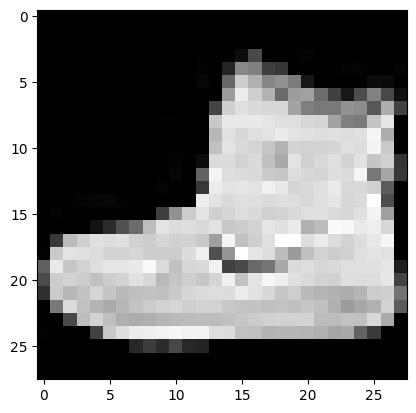

0


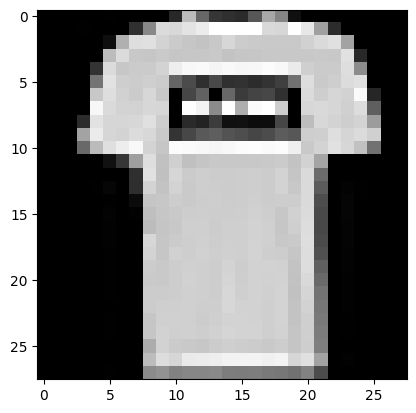

0


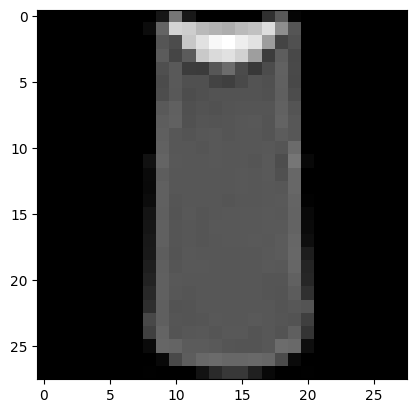

3


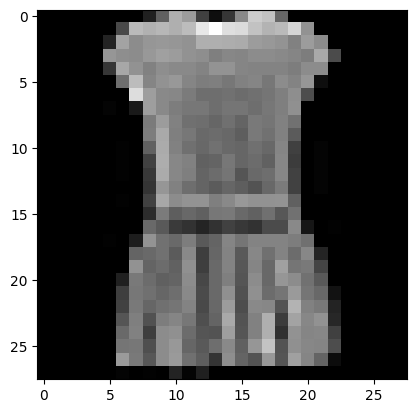

0


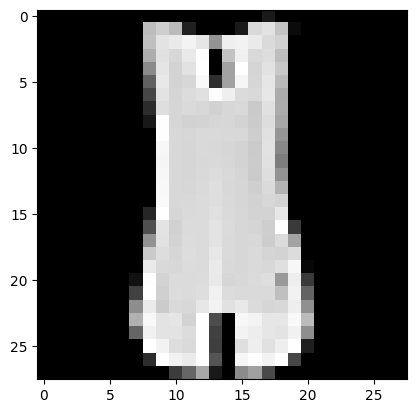

2


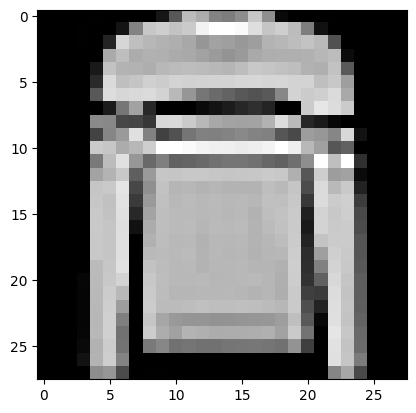

7


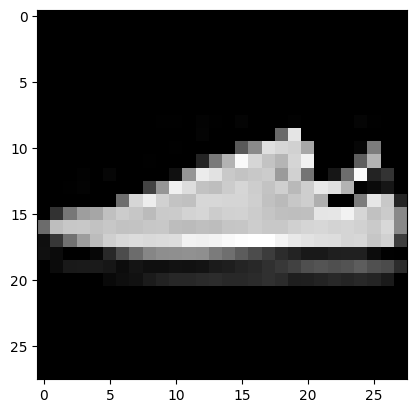

2


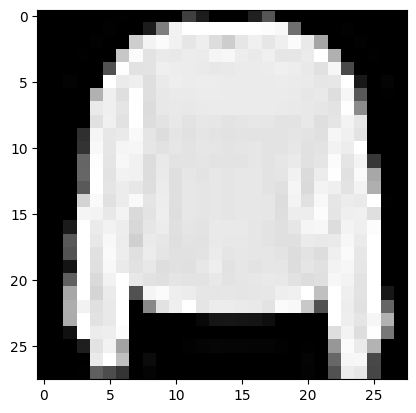

5


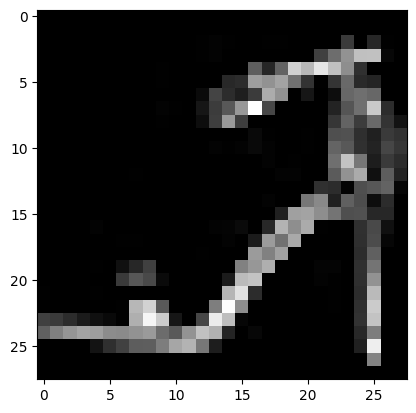

5


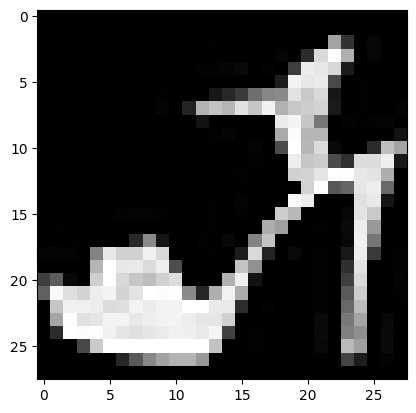

In [14]:
for i in range(10):
   plt.imshow(x_train[i],cmap="gray")
   print(y_train[i])
   plt.show()

In [15]:
x_test=x_test/255
x_train=x_train/255

#### Feedforward Neural Network Implementation: 

In [17]:
x_train.shape

(60000, 28, 28)

In [20]:
len(np.unique(y_train))

10

In [22]:
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    BatchNormalization(),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')
    
]
)

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,402 (435.16 KB)

 Trainable params: 111,274 (434.66 KB)

 Non-trainable params: 128 (512.00 B)

#### Backpropagation Algorithm Implementation:

In [25]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

In [27]:
optimizers={"adam":Adam(), "RMSprop":RMSprop(), "SGD":SGD()}
res_acc={}
res_loss={}
for name,opt in optimizers.items():
    model.compile(
        optimizer=opt,
        loss="sparse_categorical_crossentropy",
        metrics=['accuracy']
    )
    model.fit(x_train, y_train, batch_size=30, epochs=5, validation_split=0.2, callbacks=[early_stopping])
    loss,acc=model.evaluate(x_test,y_test)
    res_acc[name]=acc
    res_loss[name]=loss 
print(f"acc : {res_acc}\n")   
print(f"loss : {res_loss}\n")     

Epoch 1/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8886 - loss: 0.3022 - val_accuracy: 0.8760 - val_loss: 0.3436
Epoch 2/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8923 - loss: 0.2889 - val_accuracy: 0.8708 - val_loss: 0.3639
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8655 - loss: 0.3755
Epoch 1/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8928 - loss: 0.2891 - val_accuracy: 0.8735 - val_loss: 0.3582
Epoch 2/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8974 - loss: 0.2812 - val_accuracy: 0.8682 - val_loss: 0.3680
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8599 - loss: 0.3936
Epoch 1/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9083 - loss: 0.2487 - val_accuracy: 0.8917 - val_loss: 0.3049
Epoch 2/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9116 - loss: 0.2376 - val_accuracy: 0.8938 - val_loss: 0.3051
Epoch 3/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9134

#### Hyperparameter Tuning:

In [ ]:
## Function to build a flexible model for ezsy hyperparameter tuning 

def build_model(
    num_layers=3,
    num_neurons=64,
    activation='relu',
    lr=1e-3, #--> learning rate
    optimizer='adam'
    ):
    model=Sequential()
    model.add(Flatten(input_shape=(28,28)))
    for lay in range(num_layers):
        model.add(Dense(num_neurons,activation=activation))
    model.add(Dense(10,activation="softmax"))
    model.compile(optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model    
        

In [51]:
### dictionary defining the hyperparameter values to be tested in the tuning loop
param_grid ={

    'num_layers': [4,6],
    'num_neurons': [64,128],
    'activation': ['relu','tanh'],
    'lr': [1e-3,1e-4],
    'optimizer': ['sgd','adam']
}
results = []

### loop to train models with different hyperparameter combinations and record their performance 

for layers in param_grid['num_layers']:
    for neurons in param_grid['num_neurons']:
        for act in param_grid['activation']:
            for opt in param_grid['optimizer']:
                    model = build_model(num_layers=layers,
                                        num_neurons=neurons,
                                        activation=act,
                                        optimizer=opt,)
                    
                    history = model.fit(x_train, y_train,
                                        epochs=5, batch_size=32,
                                        validation_data=(x_test, y_test))
                    
                    acc = history.history['val_accuracy'][-1]
                    loss = history.history['val_loss'][-1]
                    results.append({"layers" : layers,
                                    "neurons":neurons,
                                    "activation":act,
                                    "optimizer":opt,
                                    "accuracy":acc,
                                   "loss" :loss})
                    print()
print(results)                    

c:\Users\Top10\conda\envs\myenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6979 - loss: 0.8709 - val_accuracy: 0.7958 - val_loss: 0.5722
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8178 - loss: 0.5167 - val_accuracy: 0.8224 - val_loss: 0.5084
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8373 - loss: 0.4586 - val_accuracy: 0.8267 - val_loss: 0.4914
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8487 - loss: 0.4246 - val_accuracy: 0.8450 - val_loss: 0.4425
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8556 - loss: 0.4029 - val_accuracy: 0.8400 - val_loss: 0.4457

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8125 - loss: 0.5215 - val_accuracy: 0.8363 - val_loss: 0.4424
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8619 - loss: 0.3782 - val_accuracy: 0.8559 - val_loss: 0.4046
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8735 - loss: 0.3448 - va

In [52]:

res_df = pd.DataFrame(results, columns=['layers', 'neurons', 'activation', 'optimizer', 'accuracy','loss'])
res_df

,layers,neurons,activation,optimizer,accuracy,loss
0,4,64,relu,sgd,0.8400,0.445706
1,4,64,relu,adam,0.8589,0.389885
2,4,64,tanh,sgd,0.8443,0.427714
3,4,64,tanh,adam,0.8663,0.372006
4,4,128,relu,sgd,0.8512,0.415509
5,4,128,relu,adam,0.8691,0.361123
6,4,128,tanh,sgd,0.8579,0.398826
7,4,128,tanh,adam,0.8587,0.370133
8,6,64,relu,sgd,0.8489,0.417476
9,6,64,relu,adam,0.8662,0.377347


#### Model Regularization and Optimization :

In [57]:
dropout=[0.1,0.2,0.3]
dropout_results=[]
for i in dropout:
    best_model= Sequential([Flatten(input_shape=(28,28))])
    for j in range(5):
        if j<5 :
             neurons=128
        else : 
            neurons=64     
        best_model.add(Dense(neurons,activation='tanh') )
        best_model.add(Dropout(i))
   
    best_model.add(Dense(10,activation='softmax'))  
    best_model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])    
    history = best_model.fit(x_train, y_train,
                        epochs=5, batch_size=32,
                        validation_data=(x_test, y_test))
                    
    acc2 = history.history['val_accuracy'][-1]
    loss2 = history.history['val_loss'][-1]
    dropout_results.append({"dropout" : i,
                            "accuracy":acc2,
                            "loss" :loss2})
print(dropout_results)

c:\Users\Top10\conda\envs\myenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.8030 - loss: 0.5428 - val_accuracy: 0.8403 - val_loss: 0.4418
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.8466 - loss: 0.4284 - val_accuracy: 0.8501 - val_loss: 0.4129
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8573 - loss: 0.3951 - val_accuracy: 0.8477 - val_loss: 0.4283
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.8655 - loss: 0.3761 - val_accuracy: 0.8635 - val_loss: 0.3849
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.8688 - loss: 0.3597 - val_accuracy: 0.8568 - val_loss: 0.4170
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.7875 - loss: 0.5948 - val_accuracy: 0.8192 - val_loss: 0.5029
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8347 - loss: 0.4707 - val_accuracy: 0.8472 - val_loss: 0.4469
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8447 - loss: 0.4

In [58]:
dropout_results = pd.DataFrame(dropout_results, columns=['dropout', 'accuracy', 'loss'])
dropout_results


,dropout,accuracy,loss
0,0.1,0.8568,0.416962
1,0.2,0.8602,0.403134
2,0.3,0.8529,0.427190


In [59]:
best_model2= Sequential([Flatten(input_shape=(28,28))])

for l in range(5):
        if l<5 :
             neurons=128
        else : 
            neurons=64     
        best_model2.add(Dense(neurons,activation='tanh') )
        best_model2.add(BatchNormalization())
   
best_model2.add(Dense(10,activation='softmax'))  
best_model2.compile(
                optimizer = 'adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])    
best_model2.fit(x_train, y_train,
                epochs=5, batch_size=32,
                validation_data=(x_test, y_test))

c:\Users\Top10\conda\envs\myenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.8148 - loss: 0.5169 - val_accuracy: 0.8319 - val_loss: 0.4751
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8542 - loss: 0.4022 - val_accuracy: 0.8328 - val_loss: 0.4443
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8637 - loss: 0.3759 - val_accuracy: 0.8287 - val_loss: 0.4539
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8723 - loss: 0.3554 - val_accuracy: 0.8505 - val_loss: 0.4145
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8752 - loss: 0.3392 - val_accuracy: 0.8613 - val_loss: 0.3908


In [61]:
from tensorflow.keras import regularizers
best_model3= Sequential([Flatten(input_shape=(28,28))])

for l in range(5):
        if l<5 :
             neurons=128
        else : 
            neurons=64     
        best_model3.add(Dense(neurons,activation='tanh',kernel_regularizer=regularizers.l2(0.001)))
   
best_model3.add(Dense(10,activation='softmax'))  
best_model3.compile(
                optimizer = 'adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])    
best_model3.fit(x_train, y_train,
                epochs=5, batch_size=32,
                validation_data=(x_test, y_test))

c:\Users\Top10\conda\envs\myenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.8112 - loss: 0.9280 - val_accuracy: 0.8275 - val_loss: 0.6966
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8350 - loss: 0.6283 - val_accuracy: 0.8357 - val_loss: 0.5999
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8437 - loss: 0.5651 - val_accuracy: 0.8322 - val_loss: 0.5795
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8492 - loss: 0.5385 - val_accuracy: 0.8340 - val_loss: 0.5759
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8540 - loss: 0.5201 - val_accuracy: 0.8472 - val_loss: 0.5335


#### Final model :

In [62]:
final_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='tanh'),
    BatchNormalization(),
    Dense(128,activation="tanh"),
    BatchNormalization(),
    Dense(128,activation="tanh"),
    BatchNormalization(),
    Dense(64,activation="tanh"),
    BatchNormalization(),
    Dense(64,activation="tanh"),
    Dense(10,activation="softmax"),

               ])

final_model.compile(
                optimizer = 'adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])    
final_model.fit(x_train, y_train,
                epochs=5, batch_size=32,
                validation_data=(x_test, y_test))

c:\Users\Top10\conda\envs\myenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.8245 - loss: 0.4957 - val_accuracy: 0.8154 - val_loss: 0.5172
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8566 - loss: 0.3982 - val_accuracy: 0.8508 - val_loss: 0.4093
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8654 - loss: 0.3705 - val_accuracy: 0.8454 - val_loss: 0.4292
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8735 - loss: 0.3490 - val_accuracy: 0.8604 - val_loss: 0.3914
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8789 - loss: 0.3346 - val_accuracy: 0.8610 - val_loss: 0.3867


In [65]:
test_loss,test_acc=final_model.evaluate(x_test,y_test)
print(f'accuracy : {test_acc}')
print(f'accuracy : {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8610 - loss: 0.3867
accuracy : 0.8610000014305115
accuracy : 0.3867338001728058
